In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg_base.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 23s 0us/step


In [4]:
model = Sequential()
model.add(vgg_base) 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='softmax')) 


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________


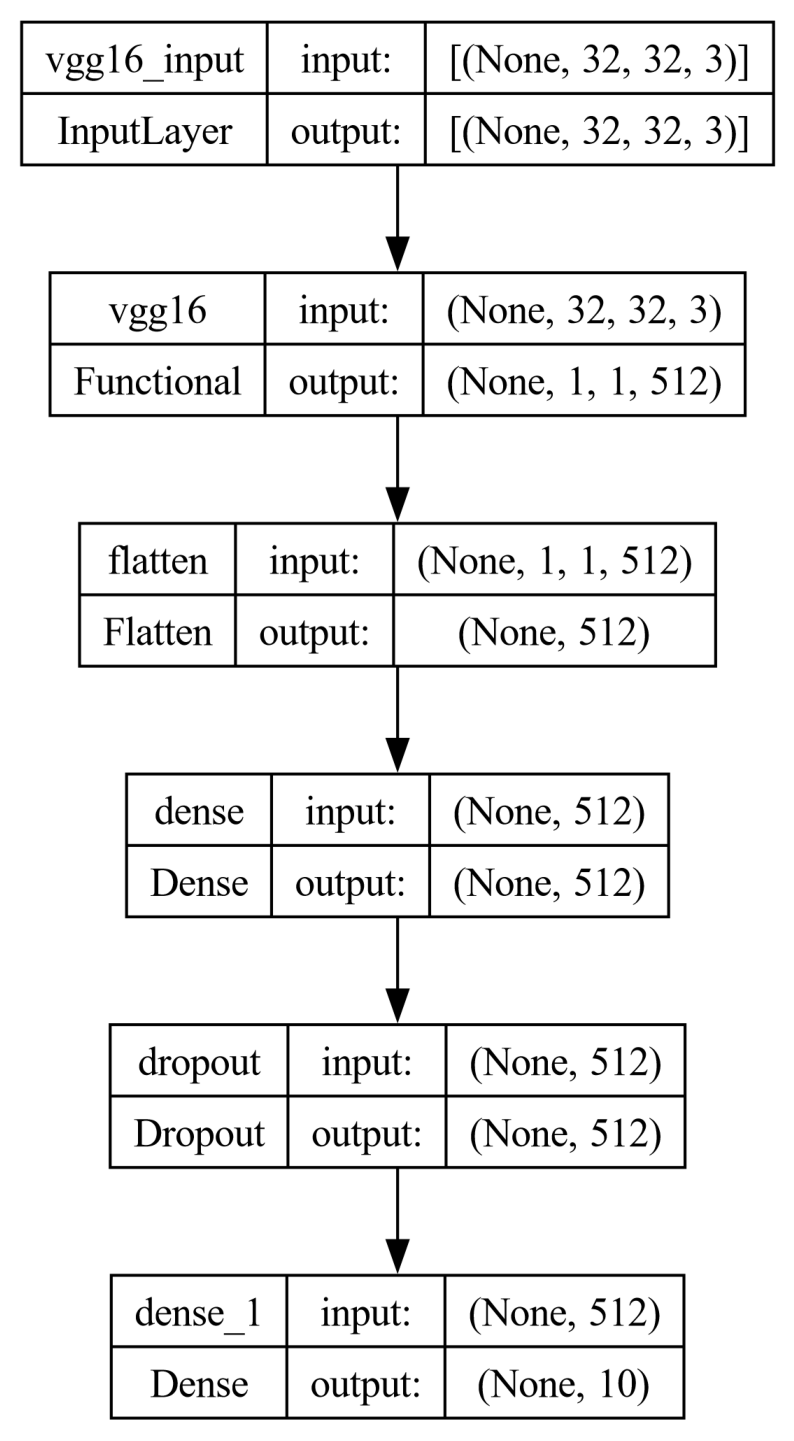

In [5]:
plot_model(model, to_file='model_architecture.png', show_shapes=True,
           show_layer_names=True, dpi=300)

plt.figure(figsize=(10, 20))
img = plt.imread('model_architecture.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 342s 274ms/step - loss: 1.4126 - accuracy: 0.5093 - val_loss: 1.3195 - val_accuracy: 0.5452
Epoch 2/10
1250/1250 [==============================] - 345s 276ms/step - loss: 1.3411 - accuracy: 0.5346 - val_loss: 1.2724 - val_accuracy: 0.5587
Epoch 3/10
1250/1250 [==============================] - 346s 276ms/step - loss: 1.2966 - accuracy: 0.5501 - val_loss: 1.2445 - val_accuracy: 0.5693
Epoch 4/10
1250/1250 [==============================] - 325s 260ms/step - loss: 1.2611 - accuracy: 0.5631 - val_loss: 1.2271 - val_accuracy: 0.5691
Epoch 5/10
1250/1250 [==============================] - 314s 251ms/step - loss: 1.2322 - accuracy: 0.5715 - val_loss: 1.2016 - val_accuracy: 0.5789
Epoch 6/10
1250/1250 [==============================] - 324s 259ms/step - loss: 1.2122 - accuracy: 0.5775 - val_loss: 1.1926 - val_accuracy: 0.5802
Epoch 7/10
1250/1250 [==============================] - 320s 256ms/step - loss: 1.1915 - accuracy: 0.5858 - val_

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 68s 217ms/step - loss: 1.1656 - accuracy: 0.5926

Test Loss: 1.1656
Test Accuracy: 59.26%


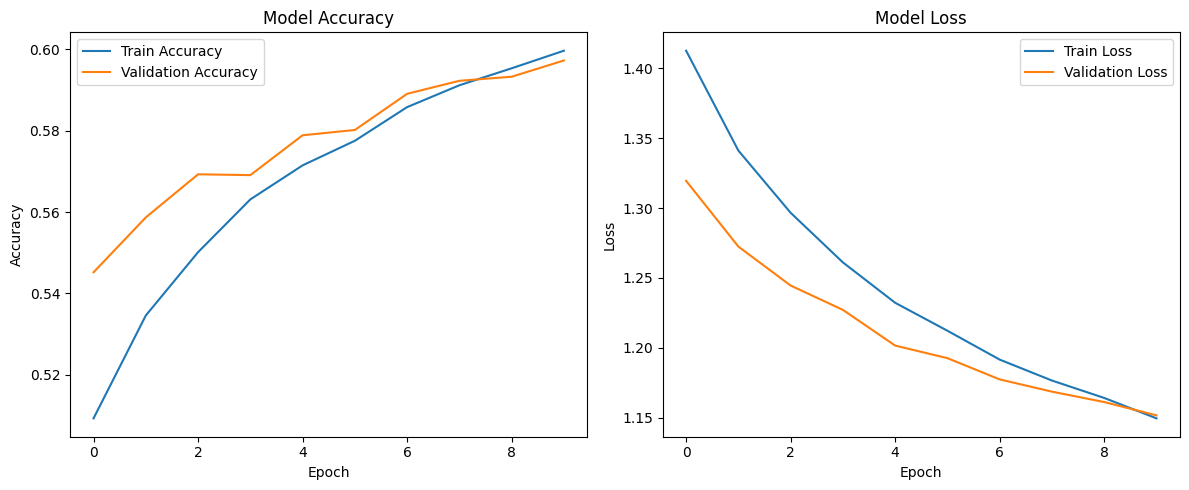

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 1s 591ms/step


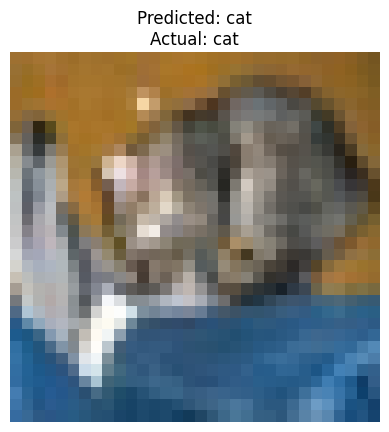

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

sample_image = x_test[0]
true_label = class_names[y_test[0][0]]

prediction_input = sample_image.reshape(1, 32, 32, 3)

prediction = model.predict(prediction_input)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(sample_image)
plt.title(f"Predicted: {predicted_class}\nActual: {true_label}")
plt.axis('off')
plt.show()